# Principal Component Analysis (Application with Images)

### Importing Auxiliary Packages

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import cv2
import random

### Loading the Dataset

In [9]:
digits = load_digits()
data = digits.data

print(f'Data Shape: {data.shape}')

Data Shape: (1797, 64)


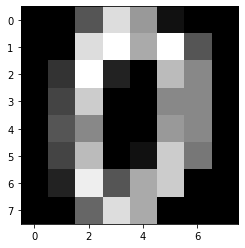

In [6]:
image_sample = data[0,:].reshape(8,8)
plt.imshow(image_sample, cmap = 'gray')

### Reduce Image Dimensions

In [63]:
# reduce the image dimensions from 64 to just 2
pca = PCA(2) 
converted_data = pca.fit_transform(digits.data)
 
print(f'Converted Data Shape: {converted_data.shape}')

Converted Data Shape: (1797, 2)


### Visualize the Resulting Dataset

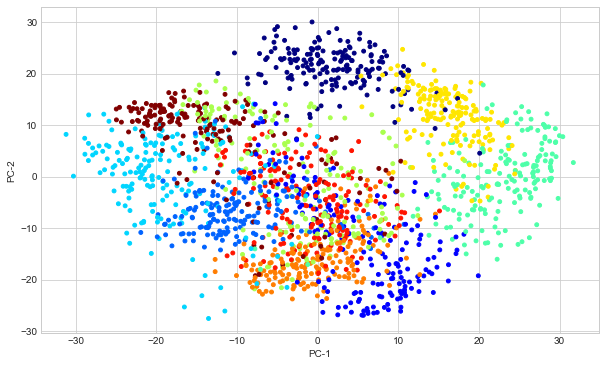

In [64]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.xlabel('PC-1') , plt.ylabel('PC-2')

plt.show()

### Viewing the Images After Decompression

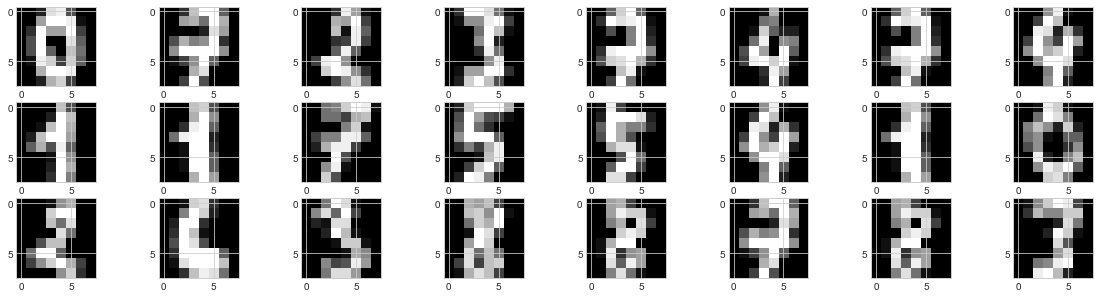

In [72]:
data_inverted = pca.inverse_transform(converted_data)

fig, ax = plt.subplots(nrows = 3, ncols = 8, figsize = (20, 5))

for i, axi in enumerate(ax.flat):
    value_plot = random.randint(0, 64)
    image_sample = data[value_plot,:].reshape(8,8)
    axi.imshow(image_sample, cmap = 'gray')

plt.show()

### Loading the Image (Example in RGB)

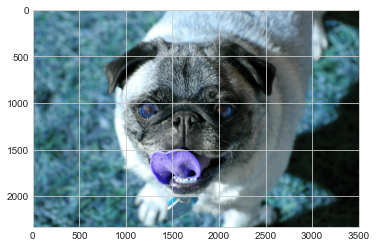

In [19]:
img = cv2.imread('dog.jpg')
blue, green, red = cv2.split(img) 

plt.imshow(img)

### Apply Principal Components to Individual Arrays

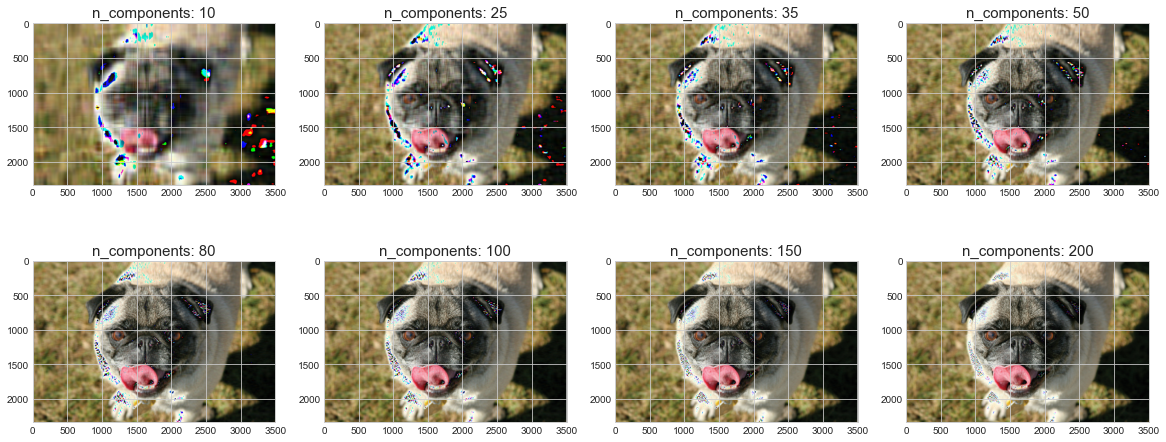

In [62]:
list_components = [10, 25, 35, 50, 80, 100, 150, 200]
converted_images = list()

for components in list_components:

    pca = PCA(components)

    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)

    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)

    converted_images.append(img_compressed)

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 8))

for i, axi in enumerate(ax.flat):
    axi.set_title(f'n_components: {list_components[i]}', size = 15)
    axi.imshow(converted_images[i])

plt.show()